## Preliminary Data Processing

In this initial step, we load the dataset `XYZloan_default_selected_vars.csv` we previously used from homework 3. Loading the dataset into a pandas DataFrame allows us to inspect its structure, ensuring that all variables are correctly formatted and ready for further exploration and modeling.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
path = '/home/ritwikgoel/Downloads/john.csv'
df = pd.read_csv(path)

df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'id'])

# Check the first few rows to understand the dataset
df.head()


,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


### Exploratory Data Analysis - Data Structure and Summary Statistics

To begin our analysis, we examine the overall structure and characteristics of the dataset.

we assess the data types of each variable and verify that there are no missing values. This inspection is crucial to identify any potential issues with data types that may impact modeling later on.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0] # Shows columns with missing values


TD022    19598
TD023     7663
TD024     3694
TD025     2550
TD026     1846
TD027     1697
TD028     1636
TD029     1630
TD044    79997
TD048    79999
TD051    79995
TD054    79988
TD055    79999
TD061    79990
TD062    79999
PA022      381
PA023      381
PA028      381
PA029      381
PA030      381
PA031      381
CD008      381
CD018      381
CD071      381
CD072      381
CD088      381
CD100      381
CD101      381
CD106      381
CD107      381
CD108      381
CD113      381
CD114      381
CD115      381
CD117      381
CD118      381
CD120      381
CD121      381
CD123      381
CD130      381
CD131      381
CD132      381
CD133      381
CD135      381
CD136      381
CD137      381
CD152      381
CD153      381
CD160      381
CD162      381
CD164      381
CD166      381
CD167      381
CD169      381
CD170      381
CD172      381
CD173      381
MB005     2793
dtype: int64

In [3]:
# Drop the specified columns from the dataframe based on proportion of NaN's
columns_to_remove = ['TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062']
df = df.drop(columns=columns_to_remove)

In [4]:
# Check the unique values of the columns (first 39)
df.nunique().head(39)

loan_default        2
AP001              37
AP002               2
AP003               5
AP004               4
AP005           55057
AP006               4
AP007               5
AP008               5
AP009               2
TD001              21
TD002              12
TD005              25
TD006              21
TD009              39
TD010              30
TD013              46
TD014              34
TD015               8
TD022               5
TD023              11
TD024              16
TD025               1
TD026               1
TD027               1
TD028               1
TD029               1
CR004               4
CR005               6
CR009           25883
CR012               1
CR015               5
CR017               8
CR018               9
CR019              12
PA022             172
PA023             167
PA028            5142
PA029            4120
dtype: int64

In [5]:
# Check the unique values of the columns (last 39)
df.nunique().tail(39)

PA031     4323
CD008    31165
CD018     2026
CD071      513
CD072      507
CD088      648
CD100      488
CD101      317
CD106      625
CD107      433
CD108      392
CD113       62
CD114       92
CD115      456
CD117      326
CD118      675
CD120      498
CD121      846
CD123      604
CD130      619
CD131      612
CD132      662
CD133      642
CD135      806
CD136      810
CD137      867
CD152    30592
CD153    30507
CD160      255
CD162      366
CD164      314
CD166     5759
CD167     5415
CD169     8565
CD170     8046
CD172    10818
CD173    10198
MB005       29
MB007      112
dtype: int64

In [6]:
# Drop the specified columns from the dataframe based on the only having 1 unique value
df = df.drop(columns=['CR012','TD025','TD026','TD027','TD028','TD029'])

In [7]:
# Set the threshold
threshold = 1000

# Get the number of unique values for each column
unique_counts = df.nunique()

# Create a list of columns that are considered categorical (i.e., unique values below the threshold)
categorical_columns = unique_counts[unique_counts < threshold].index.tolist()

# Remove 'loan_default' from the list of categorical columns if it's there
categorical_columns = [col for col in categorical_columns if col != 'loan_default']

# Create a list of columns that are considered numerical (i.e., unique values above the threshold)
numerical_columns = unique_counts[unique_counts >= threshold].index.tolist()

# Output the lists of categorical and numerical columns
print("Categorical columns (unique values below threshold):")
print(categorical_columns)

print("Numerical columns (unique values above threshold):")
print(numerical_columns)

# You can also convert the identified categorical columns to category dtype if needed
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the data types of the columns after conversion
print("\nData types after conversion:")
print(df.dtypes)

Categorical columns (unique values below threshold):
['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD160', 'CD162', 'CD164', 'MB005', 'MB007']
Numerical columns (unique values above threshold):
['AP005', 'CR009', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']

Data types after conversion:
loan_default       int64
AP001           category
AP002           category
AP003           category
AP004           category
                  ...   
CD170            float64
CD172            float64
CD173           

### Enhanced Data Cleaning: Binning Numerical-Like Categorical Columns

To enhance the data cleaning from the previous assignment, we dynamically bin numerical-like categorical columns into meaningful ranges. This reduces noise, simplifies representation, and improves interpretability. 

Key enhancements:
- Special negative values (`-99`, `-98`) are treated as separate categories to retain their significance.
- Dynamic binning divides values based on distribution, with bins labeled by their ranges (e.g., `[0 - 10)`).

This preprocessing ensures the data is clean, consistent, and ready for modeling.


In [8]:
# Set thresholds for high-cardinality and low-cardinality columns
high_cardinality_threshold = 100

# Identify numerical-like categorical columns
numerical_like_categorical_cols = []
for col in categorical_columns:
    # Check if the column contains only numeric values (ignoring NaNs)
    if df[col].dropna().apply(lambda x: str(x).isdigit()).all():
        numerical_like_categorical_cols.append(col)

# Split columns based on unique values
high_cardinality_cols = [
    col for col in numerical_like_categorical_cols if df[col].nunique() > high_cardinality_threshold
]
low_cardinality_cols = [
    col for col in numerical_like_categorical_cols if df[col].nunique() <= high_cardinality_threshold
]

# Process low-cardinality columns (directly convert to categorical)
for col in low_cardinality_cols:
    df[col] = pd.Categorical(df[col])

# Process high-cardinality columns (apply binning)
for col in high_cardinality_cols:
    # Convert to numeric type
    df[col] = pd.to_numeric(df[col])

    # Handle special negative values (-99 and -98)
    negative_values = [-99, -98]
    df[col] = df[col].replace(negative_values, np.nan)  # Temporarily replace special values


    # Apply qcut for binning (excluding NaNs)
    binned_data, bins = pd.qcut(
        df[col].dropna(),
        q=100,
        duplicates="drop",
        retbins=True
    )

    # Create bin labels based on range
    bin_labels = [
        f"[{int(bins[i])} - {int(bins[i+1])})" if i < len(bins) - 2 else f"[{int(bins[i])} - {int(bins[i+1])}]"
        for i in range(len(bins) - 1)
    ]

    # Replace column values with bin labels
    df[col] = pd.cut(df[col], bins=bins, labels=bin_labels, include_lowest=True)

    # Reintroduce -99 and -98 as their own categories
    for value in negative_values:
        df[col] = df[col].cat.add_categories([f"Special_{value}"])
        df[col].fillna(f"Special_{value}", inplace=True)

# Check the updated dataframe
print("Low Cardinality Columns Processed:")
print(low_cardinality_cols)
print("High Cardinality Columns Processed with Binning:")
print(high_cardinality_cols)
print("Updated DataFrame:")
print(df.head())


Low Cardinality Columns Processed:
['AP001', 'AP002', 'AP003', 'AP004', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019']
High Cardinality Columns Processed with Binning:
[]
Updated DataFrame:
   loan_default AP001 AP002 AP003 AP004           AP005    AP006 AP007 AP008  \
0             1    31     2     1    12  2017/7/6 10:21      ios     3     3   
1             0    27     1     1    12  2017/4/6 12:51       h5     5     4   
2             0    33     1     4    12  2017/7/1 14:11       h5     4     2   
3             0    34     2     4    12  2017/7/7 10:10  android     5     5   
4             0    47     2     1    12  2017/7/6 14:37       h5     4     4   

  AP009  ... CD162 CD164 CD166 CD167   CD169   CD170   CD172   CD173 MB005  \
0     1  ...  13.0  13.0   0.0   0.0  1449.0  1449.0  2249.0  2249.0   7.0   
1     0  ... -99.0 -99.0 -99.0 -99.0   -99.0   -99.0   -99

### Numerical Column Processing and Date Handling

For numerical columns, no scaling or transformation is applied, as both **GLM** and **AutoML** can handle the existing range of values, including `-99`, `-98`, and `NaN`. This preserves the original distribution and the significance of special values.

Additionally, the column `AP005` is identified as a date field and converted to a datetime format for potential temporal analysis. Any non-date values are coerced into `NaT` to maintain consistency.


In [9]:
# Handling 'AP005' separately as a date column and converting it to datetime format
numerical_columns = [col for col in numerical_columns if col != 'AP005']
date_column = ['AP005']
df['AP005'] = pd.to_datetime(df['AP005'], errors='coerce')

### Final Check: Data Types

Before splitting the dataset, we perform a final check to ensure that:
- **Categorical columns** are correctly processed and have the `category` data type.
- **Numerical columns** are correctly recognized as numeric (`int64`, `float64`).

This ensures consistency and compatibility with the GLM and AutoML models.


In [10]:
# Check data types for categorical columns
print("Data types for categorical columns:")
print(df[categorical_columns].dtypes)

# Check data types for numerical columns
print("\nData types for numerical columns:")
print(df[numerical_columns].dtypes)


Data types for categorical columns:
AP001    category
AP002    category
AP003    category
AP004    category
AP006    category
AP007    category
AP008    category
AP009    category
TD001    category
TD002    category
TD005    category
TD006    category
TD009    category
TD010    category
TD013    category
TD014    category
TD015    category
TD022    category
TD023    category
TD024    category
CR004    category
CR005    category
CR015    category
CR017    category
CR018    category
CR019    category
PA022    category
PA023    category
CD071    category
CD072    category
CD088    category
CD100    category
CD101    category
CD106    category
CD107    category
CD108    category
CD113    category
CD114    category
CD115    category
CD117    category
CD118    category
CD120    category
CD121    category
CD123    category
CD130    category
CD131    category
CD132    category
CD133    category
CD135    category
CD136    category
CD137    category
CD160    category
CD162    category
CD164    c

### Splitting the Cleaned Dataset to Train and Test

The dataset is split into training (80%) and testing (20%) sets to evaluate model performance. The split is stratified to ensure the target variable (`loan_default`) maintains its class distribution in both sets. A random state is used for reproducibility.


In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['loan_default'])  # Exclude the target variable
y = df['loan_default']  # Target variable

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (64000, 72)
Testing set size: (16000, 72)


In [12]:
# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
0    0.806406
1    0.193594
Name: loan_default, dtype: float64

Test set class distribution:
0    0.806375
1    0.193625
Name: loan_default, dtype: float64


### H2O Initialization and Data Upload

The H2O environment is initialized to leverage its scalable machine learning framework for training and evaluating the GLM model. The preprocessed training and testing datasets are converted into H2O frames for compatibility.

This step ensures the data is ready for model training within the H2O framework.


In [13]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Initialize H2O environment
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpafx4bugi
  JVM stdout: /tmp/tmpafx4bugi/h2o_ritwikgoel_started_from_python.out
  JVM stderr: /tmp/tmpafx4bugi/h2o_ritwikgoel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_ritwikgoel_i8cm4o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.64 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [14]:
# Convert splits to H2OFrames
train_hf = h2o.H2OFrame(pd.DataFrame(X_train, columns=X.columns).assign(loan_default=y_train.values))
test_hf = h2o.H2OFrame(pd.DataFrame(X_test, columns=X.columns).assign(loan_default=y_test.values))

# Ensure the target column is categorical
train_hf['loan_default'] = train_hf['loan_default'].asfactor()
test_hf['loan_default'] = test_hf['loan_default'].asfactor()

# Confirm data upload
print("Training data in H2O:")
train_hf.head()
print("\nTesting data in H2O:")
train_hf.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Training data in H2O:

Testing data in H2O:


AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,CR004,CR005,CR009,CR015,CR017,CR018,CR019,PA022,PA023,PA028,PA029,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007,loan_default
26,1,3,12,2017-05-27 18:56:00,ios,5,5,1,0,0,2,0,4,0,4,0,0,nan,3,4,2,1,70800,5,2,2,3,-1,-1,-98,-98,-98,-98,903,380,0,7,14,0,0,0,0,0,0,0,69,3,111,5,138,6,0,9,45,21,0,11,49,1800,1711,7,14,14,216,216,1187,1187,2428,2428,4,IPHONE7,0
34,2,1,12,2017-06-03 13:01:00,h5,4,4,1,1,1,2,1,7,1,9,3,1,10,6,10,3,1,73360,5,6,5,4,-1,-1,-98,-98,-98,-98,14830,283,30,12,48,0,0,0,0,0,0,0,59,46,91,69,117,96,135,52,64,148,224,62,105,4451,13786,14,28,24,935,935,1633,1542,3620,3414,11,WEB,1
29,1,1,12,2017-05-19 15:33:00,h5,4,3,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,1,1,9500,5,7,6,8,-1,-1,-98,-98,-98,-98,17513,590,158,68,57,0,0,0,0,0,0,0,93,73,189,150,310,245,187,102,102,187,324,167,167,17210,35051,1,2,2,141,141,141,141,166,166,7,WEB,0
31,2,1,12,2017-06-16 19:33:00,h5,3,3,1,4,1,4,1,7,2,9,2,0,25,0,8,1,1,5198,4,7,5,11,-1,-1,-98,-98,-98,-98,7455,285,77,98,42,3,0,16,8,8,2,7,78,58,108,82,147,113,86,113,116,96,131,128,134,8622,12388,0,3,3,0,0,0,0,145,145,10,WEB,0
44,1,1,12,2017-05-04 15:38:00,h5,2,2,1,4,2,6,3,8,3,7,3,0,30,9,4,3,3,152500,5,7,7,11,47,-1,163,163,-98,-98,20293,496,46,23,91,6,4,6,4,2,2,2,99,68,185,123,222,160,88,70,74,112,119,79,90,9288,10913,6,12,8,4359,600,4359,600,4904,1104,13,WEB,1
48,1,1,6,2017-06-20 09:34:00,h5,4,4,1,6,1,12,3,16,6,23,7,3,30,27,16,2,1,56344,5,7,4,4,103,103,164.889,164.889,-98,164.889,14273,270,17,56,2,0,0,0,0,0,0,0,63,47,94,70,126,98,63,91,125,66,83,138,169,29947,9928,9,14,14,686,686,1546,1546,2374,2374,11,WEB,1
21,2,3,12,2017-06-10 12:45:00,h5,3,3,1,3,1,6,1,7,1,9,1,1,20,9,4,1,1,10000,2,3,1,2,-1,-1,-98,-98,-98,-98,25269,318,15,10,2,1,0,12,6,6,1,2,38,30,56,47,75,65,200,131,131,206,295,189,189,21809,61691,0,2,1,50,0,50,0,223,173,3,WEB,0
30,1,1,12,2017-04-13 14:56:00,h5,5,3,0,3,0,7,2,12,5,14,5,1,15,18,16,3,1,8535,5,2,1,2,87,-1,174,174,-98,-98,14448,321,0,0,0,6,5,20,15,5,5,15,53,46,94,80,123,101,128,46,63,135,211,75,102,5207,12377,12,38,22,1620,598,2436,1359,4369,3104,3,WEB,1
33,1,4,12,2017-06-06 16:33:00,ios,4,4,1,2,0,2,2,4,3,5,3,2,15,6,8,4,1,473000,6,8,8,12,-1,-1,-98,-98,-98,-98,24136,638,32,30,68,2,1,2,1,1,1,1,86,55,150,97,193,124,94,99,107,119,113,117,133,14488,21187,6,22,21,381,296,1124,1039,2966,2881,7,IPHONE7,0
30,2,3,12,2017-06-29 15:19:00,android,4,4,1,0,0,0,0,0,0,1,0,1,nan,nan,nan,3,1,0,5,5,1,9,-1,-1,-98,-98,-98,-98,3326,231,28,40,56,1,0,1,0,1,1,1,24,16,55,41,75,58,87,78,78,87,123,124,124,6013,5734,10,13,10,621,621,922,753,2338,753,6,OPPO,0


## Generalized Linear Model (GLM): Baseline and Hyperparameter Tuning

We start by building a **baseline GLM model** as a reference point. The baseline model is configured with a reasonable set of hyperparameters to ensure a robust starting point. This provides a foundation for comparison when fine-tuning the model using grid search.

Key hyperparameters included in the baseline model are:
- **`family`**: Specifies the type of model. We use `binomial` for binary classification.
- **`alpha`**: Controls the balance between L1 (Lasso) and L2 (Ridge) regularization. Default value of `0.5` is used initially.
- **`lambda`**: Regularization strength to prevent overfitting. A moderate value is set.
- **`balance_classes`**: Ensures the class distribution is balanced during training.
- **`missing_values_handling`**: Missing values (`NaN`) are handled using H2O's default mechanism.

Once the baseline model is evaluated, we will proceed with **grid search** to explore different combinations of `alpha`, `lambda`, and other relevant hyperparameters to improve model performance.


In [15]:
# Initialize the baseline GLM model
baseline_glm = H2OGeneralizedLinearEstimator(
    family="binomial",  # Binary classification
    alpha=0.05,  # tiny L1 penalty to encourage sparsity
    lambda_search=True,  # Moderate regularization strength
    balance_classes=True,  # Handle class imbalance
    standardize=True,  # Standardize predictors
    interactions=None,  # Can add specific pairs later if needed
    missing_values_handling="MeanImputation"  # Default NaN handling
)

# Train the baseline model
baseline_glm.train(
    y="loan_default",  # Target variable
    training_frame=train_hf
)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1732816896406_1


GLM Model: summary
    family    link    regularization                                  lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.05, lambda = 0.001516 )  nlambda = 100, lambda.max = 1.1201, lambda.min = 0.001516, lambda.1se = -1.0  177                           84                             87                      py_1_sid_a941

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14415154273649558
RMSE: 0.3796729418018824
LogLoss: 0.452508067339041
AUC: 0.6979300197873822
AUCPR: 0.34388163863416327
Gini: 0.39586003957476446
Null degrees of freedom: 63999
Residual degrees of freedom: 63915
Null deviance: 62898.19904002497
Residual deviance: 57921.03261939725
AIC: 58091.03261939725

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2078785027665441
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      34705  16905  0.3276   (16905.0/51610.0)
1      4752   7638   0.3835   (4752.0/12390.0)
Total  39457  24543  0.3384   (21657.0/64000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.207879     0.413614  224
max f2                       0.12399      0.577926  306
max f0point5                 0.29106      0.370424  156
max accuracy                 0.586706     0.807078  29
max precision                0.936192     1         0
max recall                   0.00460197   1         399
max specificity              0.936192     1         0
max absolute_mcc             0.207879     0.23477   224
max min_per_class_accuracy   0.200341     0.644794  231
max mean_per_class_accuracy  0.19285      0.646618  238
max tns                      0.936192     51610     0
max fns                      0.936192     12389     0
max fps                      0.00460197   51610     399
max tps                      0.00460197   12390     399
max tnr                      0.936192     1         0
max fnr                      0.936192     0.999919  0
max fpr                      0.00460197   1         399
max tpr                      0.00460197   1         399

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.36 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.531091           2.69572   2.69572            0.521875         0.601598   0.521875                    0.601598            0.0269572       0.0269572                  169.572   169.572            0.0210281
2        0.02                        0.475825           2.34867   2.5222             0.454688         0.501137   0.488281                    0.551367            0.0234867       0.0504439                  134.867   152.22             0.0377526
3        0.03                        0.442213           2.36481   2.46973            0.457813         0.457863   0.478125                    0.520199            0.0236481       0.074092            

In [16]:
# Evaluate performance on the test set
baseline_glm.model_performance(test_hf)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14325922435232985
RMSE: 0.3784960030863336
LogLoss: 0.45052119796614315
AUC: 0.7009347618172209
AUCPR: 0.35699785100877274
Gini: 0.40186952363444184
Null degrees of freedom: 15999
Residual degrees of freedom: 15915
Null deviance: 15725.976585763
Residual deviance: 14416.678334916582
AIC: 14586.678334916582

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20866963481700682
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      8787   4115  0.3189   (4115.0/12902.0)
1      1218   1880  0.3932   (1218.0/3098.0)
Total  10005  5995  0.3333   (5333.0/16000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.20867      0.413505  213
max f2                       0.12335      0.578775  302
max f0point5                 0.306974     0.383703  132
max accuracy                 0.491949     0.8085    44
max precision                0.792585     1         0
max recall                   0.00802426   1         398
max specificity              0.792585     1         0
max absolute_mcc             0.252574     0.239139  172
max min_per_class_accuracy   0.197836     0.642226  224
max mean_per_class_accuracy  0.191182     0.645787  231
max tns                      0.792585     12902     0
max fns                      0.792585     3097      0
max fps                      0.00200648   12902     399
max tps                      0.00802426   3098      398
max tnr                      0.792585     1         0
max fnr                      0.792585     0.999677  0
max fpr                      0.00200648   1         399
max tpr                      0.00802426   1         398

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.16 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.519371           2.84054   2.84054            0.55             0.589404   0.55                        0.589404            0.0284054       0.0284054                  184.054   184.054            0.0228249
2        0.02                        0.460991           2.71143   2.77598            0.525            0.487559   0.5375                      0.538481            0.0271143       0.0555197                  171.143   177.598            0.0440486
3        0.03                        0.429242           2.48547   2.67915            0.48125          0.442825   0.51875                     0.506596            0.0248547       0.0803744                  148.547   167.915            0.0624702
4        0.04                        0.409747           2.32408   2.59038            0.45             0.419202   0.501563                    0.484748            0.0232408       0.103615                   132.408   159.038            0.0788904
5        0.05                        0.392038           1.93673   2.45965            0.375            0.401049   0.47625                     0.468008            0.0193673       0.122983                   93.6733   145.965            0.090507
6        0.1                         0.334573           1.96901   2.21433            0.38125          0.359558   0.42875                     0.413783            0.0984506       0.221433                   96.9012   121.433            0.150591
7        0.15                        0.297952           1.80116   2.07661            0.34875          0.314487   0.402083            

## Implementing Grid Search for GLM Model

To enhance the performance of our GLM model, we are implementing a grid search to systematically explore different hyperparameter combinations. The goal is to identify the optimal set of parameters that maximize model performance, specifically focusing on metrics such as **AUC** and **AUCPR**.

### Approach:
1. **Hyperparameters to Tune**:
    - **`alpha`**: This parameter controls the balance between L1 (lasso) and L2 (ridge) regularization. By testing a range of values from `0.0` (pure ridge) to `1.0` (pure lasso), we aim to identify the best mix for our data.
    - **`missing_values_handling`**: Options include:
        - `"MeanImputation"`: Impute missing values with the mean of the column.
        - `"Skip"`: Skip rows with missing values during training.
    - **`balance_classes`**:
        - When True, the dataset is rebalanced to equalize the number of instances in each class during training. This can improve recall for the minority class but may affect precision.
        - When False, the model trains on the original class distribution.


2. **Search Strategy**:
    - A **Cartesian grid search** is used, which exhaustively evaluates all combinations of hyperparameter values to ensure comprehensive coverage.

3. **Evaluation Metrics**:
    - **AUC**: Measures the model’s ability to distinguish between the positive and negative classes.
    - **AUCPR**: Focuses on precision and recall, providing insight into performance on the minority class.

4. **Procedure**:
    - Perform the grid search on the training dataset.
    - Sort and review models based on AUC and AUCPR to select the best-performing parameter set.
    - Evaluate the best model on the test set to confirm generalizability.

### Rationale:
Grid search provides a structured approach to hyperparameter optimization, allowing us to test multiple configurations systematically. This is particularly useful for fine-tuning the balance between underfitting and overfitting, ensuring that the model achieves the best trade-off between bias and variance.

By leveraging insights from the baseline model and the grid search results, we can refine our model to maximize predictive performance while maintaining interpretability.


In [17]:
# Define grid search hyperparameters
glm_hyper_params = {
    "alpha": [0.0, .01, 0.25, 0.5, 0.75, 1.0],  # Mix of L1 and L2
    "missing_values_handling": ["MeanImputation", "Skip"],  # Handle missing values
    "standardize": [True, False],  # Standardize predictors
}

# Define the search criteria
search_criteria = {
    "strategy": "Cartesian"  # Exhaustive search through all combinations
}

# Run grid search
glm_grid = H2OGridSearch(
    model=H2OGeneralizedLinearEstimator(
        family="binomial",
        lambda_search=True,  # Auto-tune lambda
        balance_classes=True
    ),
    hyper_params=glm_hyper_params,
    search_criteria=search_criteria
)

# Train grid search models
glm_grid.train(
    y="loan_default",
    training_frame=train_hf
)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/grid/grid_search.py:434: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


,alpha,missing_values_handling,standardize,model_ids,logloss
,0.0,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_1,0.4515904
,1.0,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_6,0.4522731
,0.75,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_5,0.4522948
,0.5,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_4,0.4523557
,0.25,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_3,0.4523679
,0.01,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_2,0.4525528
,0.0,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_7,0.4679325
,1.0,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_12,0.4688519
,0.75,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_11,0.4688760
,0.5,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_10,0.4688831


In [18]:
# Get the grid results, sorted by validation AUC
glm_gridperf = glm_grid.get_grid(sort_by='aucpr', decreasing=True)
glm_gridperf

,alpha,missing_values_handling,standardize,model_ids,aucpr
,0.0,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_7,0.3595545
,1.0,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_12,0.3563044
,0.75,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_11,0.3561428
,0.5,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_10,0.3560688
,0.25,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_9,0.3557789
,0.01,Skip,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_8,0.3550119
,0.0,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_1,0.3471609
,1.0,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_6,0.3446580
,0.75,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_5,0.3445554
,0.5,MeanImputation,true,Grid_GLM_py_1_sid_a941_model_python_1732816896406_4_model_4,0.3443714


In [19]:
# Sort the models based on best AUCPR value
glm_gridperf = glm_grid.get_grid(sort_by='aucpr', decreasing=True)

# Grab the top GLM model, chosen by validation AUCPR
best_glm = glm_gridperf.models[0]

best_glm.model_performance(test_hf)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14955664556458995
RMSE: 0.3867255429430411
LogLoss: 0.46652728627167417
AUC: 0.698041219799806
AUCPR: 0.3663532159308705
Gini: 0.3960824395996121
Null degrees of freedom: 11657
Residual degrees of freedom: 11493
Null deviance: 11827.545044006027
Residual deviance: 10877.550206710359
AIC: 11207.550206710359

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22294213747959407
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      6298  2970  0.3205   (2970.0/9268.0)
1      943   1447  0.3946   (943.0/2390.0)
Total  7241  4417  0.3356   (3913.0/11658.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.222942     0.425151  208
max f2                       0.119505     0.593524  308
max f0point5                 0.304572     0.39681   140
max accuracy                 0.496354     0.797049  44
max precision                0.701067     0.727273  7
max recall                   0.00481864   1         398
max specificity              0.999746     0.999892  0
max absolute_mcc             0.246383     0.238412  187
max min_per_class_accuracy   0.211218     0.637031  219
max mean_per_class_accuracy  0.222942     0.642491  208
max tns                      0.999746     9267      0
max fns                      0.999746     2390      0
max fps                      0.000688277  9268      399
max tps                      0.00481864   2390      398
max tnr                      0.999746     0.999892  0
max fnr                      0.999746     1         0
max fpr                      0.000688277  1         399
max tpr                      0.00481864   1         398

Gains/Lift Table: Avg response rate: 20.50 %, avg score: 20.36 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.010036                    0.536921           2.75159   2.75159            0.564103         0.60717    0.564103                    0.60717             0.0276151       0.0276151                  175.159    175.159            0.0221123
2        0.0200721                   0.480934           2.54314   2.64737            0.521368         0.506708   0.542735                    0.556939            0.025523        0.0531381                  154.314    164.737            0.041593
3        0.0300223                   0.455062           2.52301   2.60615            0.517241         0.467091   0.534286                    0.527161            0.0251046       0.0782427                  152.301    160.615            0.0606553
4        0.0400583                   0.431748           1.91778   2.43369            0.393162         0.442458   0.498929                    0.50594             0.0192469       0.0974895                  91.7777    143.369            0.0722414
5        0.0500086                   0.412372           2.31276   2.40963            0.474138         0.421848   0.493997                    0.489208            0.0230126       0.120502                   131.276    140.963            0.0886721
6        0.100017                    0.355372           1.89089   2.15026            0.38765          0.381604   0.440823                    0.435406            0.0945607       0.215063                   89.0889    115.026            0.144713
7        0.150026                    0.317332           1.83232   2.04428            0.375643         0.335159   0.419097           

In [20]:
best_glm.predict(test_hf)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: ["AND", "APPLE", "BOWAY", "DOOVL5PRO", "MANN", "MC-X7MINI", "RAMOS", "TINAI", "VOLTE"]
  warnings.warn(w)


predict,p0,p1
0,0.853919,0.146081
0,0.909841,0.0901588
0,0.913544,0.0864557
,nan,nan
1,0.750373,0.249627
1,0.774182,0.225818
0,0.967319,0.0326815
,nan,nan
1,0.723551,0.276449
,nan,nan


In [21]:
def createGains(model):
    predictions = model.predict(test_hf)
    test_scores = test_hf['loan_default'].cbind(predictions).as_data_frame()
    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

In [22]:
createGains(best_glm)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,491,1109,1600,491,1109,0.16,0.09,309.8,1.58,7.0,30.69
1,1600,476,1124,3200,967,2233,0.31,0.17,619.6,1.56,14.0,30.22
2,1600,487,1113,4800,1454,3346,0.47,0.26,929.4,1.56,21.0,30.29
3,1600,280,1320,6400,1734,4666,0.56,0.36,1239.2,1.40,20.0,27.09
4,1600,214,1386,8000,1948,6052,0.63,0.47,1549.0,1.26,16.0,24.35
5,1600,195,1405,9600,2143,7457,0.69,0.58,1858.8,1.15,11.0,22.32
6,1600,192,1408,11200,2335,8865,0.75,0.69,2168.6,1.08,6.0,20.85
7,1600,249,1351,12800,2584,10216,0.83,0.79,2478.4,1.04,4.0,20.19
8,1600,271,1329,14400,2855,11545,0.92,0.89,2788.2,1.02,3.0,19.83


In [23]:
y_actual = test_hf['loan_default'].as_data_frame()

/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [24]:
def ROC_AUC(my_result, df, target):
    from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract actual and predicted values
    y_actual = df[target].as_data_frame().values.flatten()
    y_pred = my_result.predict(df)["p1"].as_data_frame().values.flatten()

    # Remove rows with NaN predictions
    valid_indices = ~np.isnan(y_pred)
    y_actual = y_actual[valid_indices]
    y_pred = y_pred[valid_indices]

    # Check for valid inputs
    if len(y_actual) != len(y_pred):
        raise ValueError("Length of actual and predicted values must match.")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_actual, y_pred)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_actual, y_pred)
    average_precision = average_precision_score(y_actual, y_pred)

    # Print summary
    print("\n   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)")
    print("   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)")
    print("   * Recall (R): True Positives / (True Positives + False Negatives)\n")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Average Precision (Precision-Recall AUC): {average_precision:.4f}")

    # Plotting
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve: AUC = {:.4f}".format(roc_auc))
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color="b", alpha=0.8, where="post", label="PR curve")
    plt.fill_between(recall, precision, step="post", alpha=0.2, color="b")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title("Precision-Recall Curve: PR AUC = {:.4f}".format(average_precision))
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


glm prediction progress: |

/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.6981
Average Precision (Precision-Recall AUC): 0.3668


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: ["AND", "APPLE", "BOWAY", "DOOVL5PRO", "MANN", "MC-X7MINI", "RAMOS", "TINAI", "VOLTE"]
  warnings.warn(w)


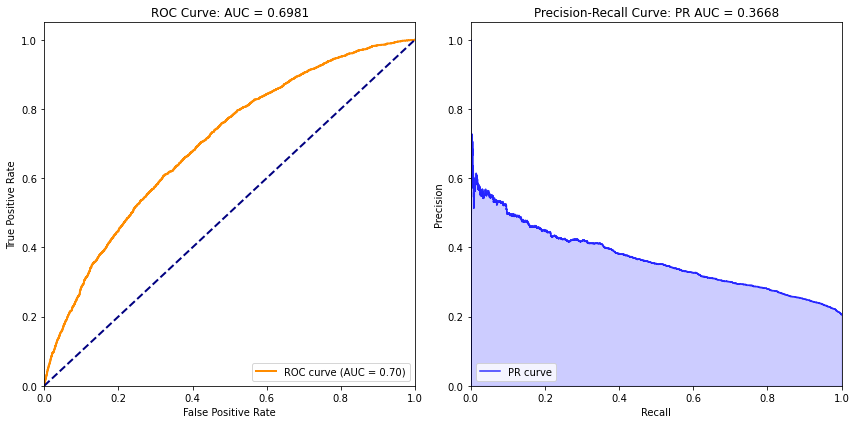

In [25]:
ROC_AUC(best_glm,test_hf,'loan_default')

### **Results and Takeaways: Generalized Linear Model (GLM) Performance**

#### **Model Results:**
- **Best Model Configuration:**
  - **Alpha**: `0.0` (No L1 regularization, fully relies on L2 penalty)
  - **Missing Values Handling**: `Skip`
  - **Standardize Predictors**: `True`
  - **AUC**: `0.6981`
  - **PR AUC**: `0.3668`

#### **ROC Curve Observations:**
- The **ROC AUC** value of `0.6981` indicates a fair ability of the model to distinguish between classes (better than random guessing but not highly accurate).
- The curve shows gradual improvement across all thresholds but lacks sharp increases, reflecting moderate sensitivity and specificity.

#### **Precision-Recall (PR) Curve Observations:**
- The **PR AUC** value of `0.3668` reflects the model's ability to handle class imbalance. While reasonable, it suggests room for improvement in predicting positive cases (loan defaults).
- Precision drops significantly as recall increases, indicating the challenge of maintaining high precision while improving recall.

#### **Takeaways:**
1. **Model Insights**:
   - The best-performing model effectively skipped rows with missing values (`Skip` strategy) instead of imputing, which contributed to slightly better predictions.
   - Using no L1 regularization (alpha = 0.0) allowed for a more flexible fit without enforcing sparsity in coefficients.

2. **Performance Gaps**:
   - While the ROC AUC is close to 0.70, indicating a moderate discriminatory ability, the PR AUC (~0.3668) shows that handling minority class predictions (loan defaults) remains challenging.

3. **Next Steps**:
   - Consider refining feature engineering, especially for categorical variables and interaction terms, to capture additional predictive signals.
   - Explore alternative modeling approaches, such as ensemble methods (e.g., Random Forest, XGBoost), which may handle class imbalance and non-linear relationships more effectively.

The results from the GLM provide a solid baseline but highlight areas for further improvement in both feature representation and model complexity. This concludes the GLM analysis section, with the next steps focusing on more sophisticated modeling techniques.


## H2O AutoML for Mortgage Default Prediction

In this section, we leverage **H2O AutoML** to streamline the model-building process for predicting mortgage defaults. AutoML automates training and evaluation across multiple algorithms (e.g., GLM, GBM, Random Forest, Deep Learning) and ranks models based on performance metrics like AUC.

### Why AutoML?
- Eliminates the need for manual hyperparameter tuning.
- Trains and compares diverse models efficiently.
- Provides a leaderboard to identify the best-performing model for our dataset.

We will use the preprocessed training and testing datasets, ensuring consistent evaluation metrics and results. Let's implement AutoML to determine the optimal model for this task.


In [26]:
# Import AutoML from H2O
from h2o.automl import H2OAutoML

# Initialize AutoML with a runtime limit and desired settings
automl = H2OAutoML(
    max_runtime_secs=9*3600,  # 9 hour training limit
    seed=42,  # For reproducibility
    balance_classes=True,  # Handle class imbalance
    stopping_metric="AUCPR",  # Optimize based on AUCPR
    sort_metric="AUCPR",  # Sort leaderboard by AUCPR
    max_models=300,  # Limit to 300 models for evaluation
    nfolds=5  # Cross-validation for robust performance
)

# Train AutoML
automl.train(
    y="loan_default",  # Target variable
    training_frame=train_hf,
    leaderboard_frame=test_hf  # Evaluate on test data for leaderboard rankings
)

# Display the leaderboard
automl_leaderboard = automl.leaderboard
print(automl_leaderboard)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    aucpr       auc    logloss    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20241128_130210  0.365915  0.711158   0.445967                0.351196  0.376762  0.14195
StackedEnsemble_AllModels_1_AutoML_1_20241128_130210     0.364312  0.71115    0.44607                 0.35021   0.376881  0.14204
XGBoost_grid_1_AutoML_1_20241128_130210_model_74         0.359817  0.708525   0.614491                0.353454  0.462849  0.214229
DeepLearning_grid_3_AutoML_1_20241128_130210_model_6     0.359597  0.703178   0.466456                0.359356  0.384688  0.147985
DeepLearning_grid_3_AutoML_1_20241128_130210_model_5     0.35933   0.704273   0.452758                0.35394   0.379279  0.143853
DeepLearning_grid_3_AutoML_1_20241128_130210_model_9     0.359089  0.707615   0.451569                0.348665  0.379537 

In [27]:
pred = automl.predict(test_hf)
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: ["AND", "APPLE", "BOWAY", "DOOVL5PRO", "MANN", "MC-X7MINI", "RAMOS", "TINAI", "VOLTE"]
  warnings.warn(w)


predict,p0,p1
1,0.778726,0.221274
0,0.917351,0.0826493
0,0.909479,0.0905208
1,0.758802,0.241198
1,0.69856,0.30144
1,0.764238,0.235762
0,0.959772,0.0402283
0,0.985171,0.0148294
1,0.753894,0.246106
0,0.872068,0.127932


In [28]:
perf = automl.leader.model_performance(test_hf)
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.14194955073836305
RMSE: 0.37676192846194406
LogLoss: 0.4459669197244253
AUC: 0.7111584908991144
AUCPR: 0.3659152389928349
Gini: 0.42231698179822885
Null degrees of freedom: 15999
Residual degrees of freedom: 15994
Null deviance: 15725.976585763
Residual deviance: 14270.94143118161
AIC: 14282.94143118161

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19930079046274846
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      8375  4527  0.3509   (4527.0/12902.0)
1      1089  2009  0.3515   (1089.0/3098.0)
Total  9464  6536  0.351    (5616.0/16000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.199301     0.417065  219
max f2                       0.117895     0.588433  303
max f0point5                 0.317972     0.392648  123
max accuracy                 0.468613     0.80875   44
max precision                0.747275     1         0
max recall                   0.0164975    1         394
max specificity              0.747275     1         0
max absolute_mcc             0.256998     0.245765  171
max min_per_class_accuracy   0.199301     0.648483  219
max mean_per_class_accuracy  0.199301     0.648804  219
max tns                      0.747275     12902     0
max fns                      0.747275     3097      0
max fps                      0.00567468   12902     399
max tps                      0.0164975    3098      394
max tnr                      0.747275     1         0
max fnr                      0.747275     0.999677  0
max fpr                      0.00567468   1         399
max tpr                      0.0164975    1         394

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.19 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.508491           2.93738   2.93738            0.56875          0.557073   0.56875                     0.557073            0.0293738       0.0293738                  193.738   193.738            0.0240258
2        0.02                        0.463864           2.84054   2.88896            0.55             0.485829   0.559375                    0.521451            0.0284054       0.0577792                  184.054   188.896            0.0468507
3        0.03                        0.438312           2.35636   2.71143            0.45625          0.450809   0.525                       0.497903            0.0235636       0.0813428                  135.636   171.143            0.0636711
4        0.04                        0.417513           2.4532    2.64687            0.475            0.427974   0.5125                      0.480421            0.024532        0.105875                   145.32    164.687            0.0816925
5        0.05                        0.404069           2.4532    2.60813            0.475            0.410044   0.505                       0.466346            0.024532        0.130407                   145.32    160.813            0.0997138
6        0.1                         0.347396           2.02066   2.3144             0.39125          0.372736   0.448125                    0.419541            0.101033        0.23144                    102.066   131.44             0.163001
7        0.15                        0.30941            1.78179   2.13686            0.345            0.327806   0.41375        

In [29]:
createGains(automl)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,460,1140,1600,460,1140,0.15,0.09,309.8,1.48,6.0,28.75
1,1600,493,1107,3200,953,2247,0.31,0.17,619.6,1.54,14.0,29.78
2,1600,513,1087,4800,1466,3334,0.47,0.26,929.4,1.58,21.0,30.54
3,1600,502,1098,6400,1968,4432,0.64,0.34,1239.2,1.59,30.0,30.75
4,1600,192,1408,8000,2160,5840,0.70,0.45,1549.0,1.39,25.0,27.00
5,1600,183,1417,9600,2343,7257,0.76,0.56,1858.8,1.26,20.0,24.41
6,1600,189,1411,11200,2532,8668,0.82,0.67,2168.6,1.17,15.0,22.61
7,1600,189,1411,12800,2721,10079,0.88,0.78,2478.4,1.10,10.0,21.26
8,1600,215,1385,14400,2936,11464,0.95,0.89,2788.2,1.05,6.0,20.39


In [30]:
model_ids = list(automl.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['StackedEnsemble_BestOfFamily_1_AutoML_1_20241128_130210',
 'StackedEnsemble_AllModels_1_AutoML_1_20241128_130210',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_74',
 'DeepLearning_grid_3_AutoML_1_20241128_130210_model_6',
 'DeepLearning_grid_3_AutoML_1_20241128_130210_model_5',
 'DeepLearning_grid_3_AutoML_1_20241128_130210_model_9',
 'DeepLearning_grid_2_AutoML_1_20241128_130210_model_16',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_85',
 'GBM_grid_1_AutoML_1_20241128_130210_model_65',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_1',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_6',
 'DeepLearning_grid_3_AutoML_1_20241128_130210_model_30',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_106',
 'GBM_grid_1_AutoML_1_20241128_130210_model_55',
 'GBM_grid_1_AutoML_1_20241128_130210_model_50',
 'DeepLearning_grid_1_AutoML_1_20241128_130210_model_32',
 'XGBoost_grid_1_AutoML_1_20241128_130210_model_83',
 'GLM_1_AutoML_1_20241128_130210',
 'XGBoost_grid_1_AutoML_1_20241128_1302

In [33]:
# Extract the first model as the best model (assumed to be sorted by performance)
best_model_id = model_ids[0]
best_model_id

'StackedEnsemble_BestOfFamily_1_AutoML_1_20241128_130210'

In [34]:
# Retrieve the best model using its ID
best_model = h2o.get_model(best_model_id)

In [35]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20241128_130210',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20241128_130210'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241128_130210_training_py_1_sid_a941',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241128_130210_training_py_1_sid_a941'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241128_130210_training_py_1_sid_a941',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241128_130210_training_py_1_sid_a941'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [36]:
best_model.predict(test_hf)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: ["AND", "APPLE", "BOWAY", "DOOVL5PRO", "MANN", "MC-X7MINI", "RAMOS", "TINAI", "VOLTE"]
  warnings.warn(w)


predict,p0,p1
1,0.778726,0.221274
0,0.917351,0.0826493
0,0.909479,0.0905208
1,0.758802,0.241198
1,0.69856,0.30144
1,0.764238,0.235762
0,0.959772,0.0402283
0,0.985171,0.0148294
1,0.753894,0.246106
0,0.872068,0.127932


In [37]:
best_model.model_performance(test_hf)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.14194955073836305
RMSE: 0.37676192846194406
LogLoss: 0.4459669197244253
AUC: 0.7111584908991144
AUCPR: 0.3659152389928349
Gini: 0.42231698179822885
Null degrees of freedom: 15999
Residual degrees of freedom: 15994
Null deviance: 15725.976585763
Residual deviance: 14270.94143118161
AIC: 14282.94143118161

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19930079046274846
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      8375  4527  0.3509   (4527.0/12902.0)
1      1089  2009  0.3515   (1089.0/3098.0)
Total  9464  6536  0.351    (5616.0/16000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.199301     0.417065  219
max f2                       0.117895     0.588433  303
max f0point5                 0.317972     0.392648  123
max accuracy                 0.468613     0.80875   44
max precision                0.747275     1         0
max recall                   0.0164975    1         394
max specificity              0.747275     1         0
max absolute_mcc             0.256998     0.245765  171
max min_per_class_accuracy   0.199301     0.648483  219
max mean_per_class_accuracy  0.199301     0.648804  219
max tns                      0.747275     12902     0
max fns                      0.747275     3097      0
max fps                      0.00567468   12902     399
max tps                      0.0164975    3098      394
max tnr                      0.747275     1         0
max fnr                      0.747275     0.999677  0
max fpr                      0.00567468   1         399
max tpr                      0.0164975    1         394

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.19 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.508491           2.93738   2.93738            0.56875          0.557073   0.56875                     0.557073            0.0293738       0.0293738                  193.738   193.738            0.0240258
2        0.02                        0.463864           2.84054   2.88896            0.55             0.485829   0.559375                    0.521451            0.0284054       0.0577792                  184.054   188.896            0.0468507
3        0.03                        0.438312           2.35636   2.71143            0.45625          0.450809   0.525                       0.497903            0.0235636       0.0813428                  135.636   171.143            0.0636711
4        0.04                        0.417513           2.4532    2.64687            0.475            0.427974   0.5125                      0.480421            0.024532        0.105875                   145.32    164.687            0.0816925
5        0.05                        0.404069           2.4532    2.60813            0.475            0.410044   0.505                       0.466346            0.024532        0.130407                   145.32    160.813            0.0997138
6        0.1                         0.347396           2.02066   2.3144             0.39125          0.372736   0.448125                    0.419541            0.101033        0.23144                    102.066   131.44             0.163001
7        0.15                        0.30941            1.78179   2.13686            0.345            0.327806   0.41375        

In [38]:
createGains(best_model)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,460,1140,1600,460,1140,0.15,0.09,309.8,1.48,6.0,28.75
1,1600,493,1107,3200,953,2247,0.31,0.17,619.6,1.54,14.0,29.78
2,1600,513,1087,4800,1466,3334,0.47,0.26,929.4,1.58,21.0,30.54
3,1600,502,1098,6400,1968,4432,0.64,0.34,1239.2,1.59,30.0,30.75
4,1600,192,1408,8000,2160,5840,0.70,0.45,1549.0,1.39,25.0,27.00
5,1600,183,1417,9600,2343,7257,0.76,0.56,1858.8,1.26,20.0,24.41
6,1600,189,1411,11200,2532,8668,0.82,0.67,2168.6,1.17,15.0,22.61
7,1600,189,1411,12800,2721,10079,0.88,0.78,2478.4,1.10,10.0,21.26
8,1600,215,1385,14400,2936,11464,0.95,0.89,2788.2,1.05,6.0,20.39


stackedensemble prediction progress: |

/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7112
Average Precision (Precision-Recall AUC): 0.3661


/home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: ["AND", "APPLE", "BOWAY", "DOOVL5PRO", "MANN", "MC-X7MINI", "RAMOS", "TINAI", "VOLTE"]
  warnings.warn(w)


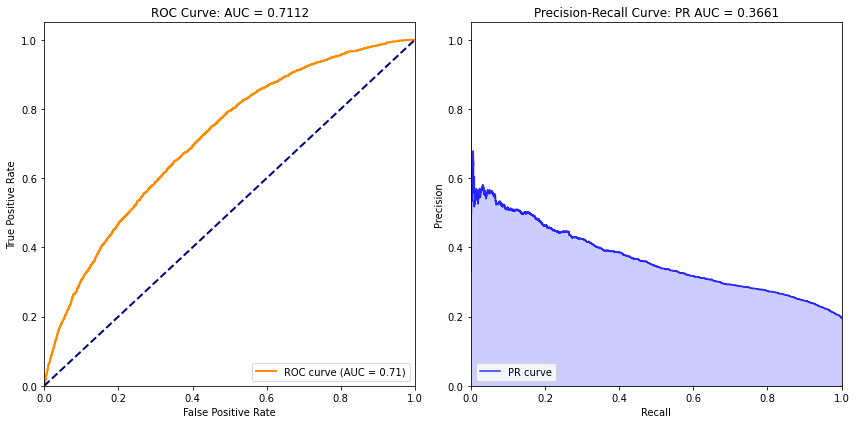

In [39]:
ROC_AUC(best_model,test_hf,'loan_default')

### AutoML Leaderboard Results

After completing the AutoML process, the leaderboard ranks models based on their performance on the test dataset.

#### Key Observations:
- The best model (Stacked Ensemble) achieved an AUC score of `0.7112` and an AUCPR score of `0.3661`, outperforming all other models.
- Additional high-ranking models leveraged ensemble methods such as XGBoost and Gradient Boosting Machines, highlighting the power of leveraging multiple algorithms.

These results emphasize AutoML's ability to identify complex patterns in the data efficiently.


### Comparison: AutoML vs. GLM

#### Performance Metrics:
- **GLM**: AUC = `0.6981`, AUCPR = `0.3668`
- **AutoML Best Model**: AUC = `0.7112`, AUCPR = `0.3661`

#### Key Takeaways:
1. **AUC Comparison**: The AutoML model slightly outperformed the GLM model in terms of AUC, indicating better discrimination between classes.
2. **AUCPR Comparison**: The GLM model demonstrated a slightly better precision-recall trade-off with an AUCPR of `0.3668` compared to `0.3661` for AutoML.
3. **Insights**: AutoML's marginal improvement in AUC highlights its ability to identify subtle patterns, though the GLM model's performance remains competitive, especially in recall-heavy tasks.

This comparison suggests that while AutoML provides a slight edge in overall discrimination, GLM is nearly as effective, offering the advantage of simplicity and interpretability.


### Takeaways and Future Considerations

#### Summary:
1. **Performance Gap**: AutoML's AUC score (`0.7112`) reflects its ability to slightly outperform GLM, but the AUCPR scores (`0.3668` vs. `0.3661`) suggest that both models handle imbalanced data comparably in terms of precision-recall trade-offs.
2. **Model Trade-offs**: The GLM model remains a strong baseline, offering simplicity and interpretability, while AutoML provides incremental improvements by leveraging advanced algorithms.
3. **Application Context**: Depending on the problem requirements, the choice of model could balance between AutoML's slight performance advantage and GLM's interpretability.

#### Future Considerations:
- **Model Interpretation**: Perform feature importance analysis for both models to understand the driving factors behind their predictions.
- **Model Deployment**: Consider deploying the AutoML model for scenarios requiring higher discrimination and GLM for scenarios prioritizing interpretability.
- **Broader Evaluation**: Extend the analysis to other datasets or domains to assess the generalizability of these findings.
